# Data Loading and Checking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon

In [2]:
plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [3]:
hospital_features=feature_category_dict['Hospital']

hospital_data=data[hospital_features]

# compute the number of missing values in each column
missing_values=hospital_data.isnull().sum()

print('Number of missing values in each column')
# also print the type of each column

for i in range(len(missing_values)):
    print(f'{hospital_data.columns[i]}: {missing_values.iloc[i]} missing values ::: dtype: {hospital_data.dtypes.iloc[i]}')


hospital_data.head()

Number of missing values in each column
Public hospital separations, 2012-13: 0 missing values ::: dtype: float64
Nearest Public Hospital: 0 missing values ::: dtype: object
Travel time to nearest public hospital: 0 missing values ::: dtype: float64
Distance to nearest public hospital: 0 missing values ::: dtype: float64
Obstetric type separations, 2012-13: 0 missing values ::: dtype: object
Nearest public hospital with maternity services: 0 missing values ::: dtype: object
Time to nearest public hospital with maternity services: 0 missing values ::: dtype: float64
Distance to nearest public hospital with maternity services: 0 missing values ::: dtype: float64
Presentations to emergency departments, 2012-13: 0 missing values ::: dtype: float64
Nearest public hospital with emergency department: 0 missing values ::: dtype: object
Travel time to nearest public hospital with emergency department: 0 missing values ::: dtype: float64
Distance to nearest public hospital with emergency departm

,"Public hospital separations, 2012-13",Nearest Public Hospital,Travel time to nearest public hospital,Distance to nearest public hospital,"Obstetric type separations, 2012-13",Nearest public hospital with maternity services,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,2701.557647,Western Hospital (Footscray),5.254528,3.876415,215.5550042481527,Royal Women's Hospital,6.490453,4.912570,3313.052180,Royal Melbourne Hospital,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032
1,2964.691696,Western Hospital (Footscray),5.028871,3.875731,189.98005347998108,Sunshine Hospital,8.071881,6.216803,2632.949379,Royal Melbourne Hospital,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428
2,9644.630863,Craigieburn Health Service,7.280902,7.277191,918.9149121263106,The Northern Hospital,11.570855,15.213189,9915.723721,The Northern Hospital,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988
3,5781.347185,Maroondah Hospital,5.093285,3.601752,317.51605093008055,Yarra Ranges Health,10.683462,9.413847,6149.574954,Maroondah Hospital,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026
4,4694.587633,Broadmeadows Health Service,8.910941,6.645261,287.0439496672183,The Northern Hospital,11.510757,12.004044,3799.030890,The Northern Hospital,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315


In [4]:
numerical_features=hospital_data.select_dtypes(include=[np.number]).columns
categorical_features=hospital_data.select_dtypes(include=[object]).columns

print('Numerical Features\n-----------------')
print(numerical_features)
print()
print('Categorical Features\n-----------------')
print(categorical_features)

Numerical Features
-----------------
Index(['Public hospital separations, 2012-13',
       'Travel time to nearest public hospital',
       'Distance to nearest public hospital',
       'Time to nearest public hospital with maternity services',
       'Distance to nearest public hospital with maternity services',
       'Presentations to emergency departments, 2012-13',
       'Travel time to nearest public hospital with emergency department',
       'Distance to nearest public hospital with emergency department',
       'Presentations to emergency departments due to injury',
       'Presentations to emergency departments due to injury, %',
       'Category 4 & 5 emergency department presentations',
       'Category 4 & 5 emergency department presentations, %'],
      dtype='object')

Categorical Features
-----------------
Index(['Nearest Public Hospital', 'Obstetric type separations, 2012-13',
       'Nearest public hospital with maternity services',
       'Nearest public hospital wi

# Focus: Access to Healthcare

## Check which towns got its own public healthcare 

In [5]:
hospital_data['Nearest Public Hospital']

0                   Western Hospital (Footscray)
1                   Western Hospital (Footscray)
2                     Craigieburn Health Service
3                             Maroondah Hospital
4                    Broadmeadows Health Service
5                   Western Hospital (Footscray)
6                    Broadmeadows Health Service
7              Monash Medical Centre (Moorabbin)
8               Caulfield General Medical Centre
9                    Broadmeadows Health Service
10    Sandringham and District Memorial Hospital
11             Monash Medical Centre (Moorabbin)
12    Sandringham and District Memorial Hospital
13             Monash Medical Centre (Moorabbin)
14                            Dandenong Hospital
15                      Royal Melbourne Hospital
16                         St Vincent's Hospital
17                      Royal Melbourne Hospital
18                      Royal Melbourne Hospital
19                      Royal Melbourne Hospital
20                  

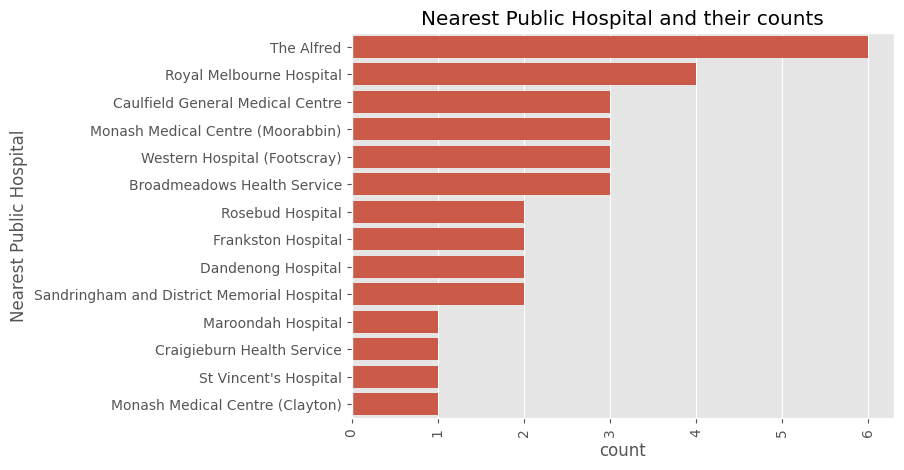

Nearest Public Hospital and their counts
Nearest Public Hospital
The Alfred                                    6
Royal Melbourne Hospital                      4
Caulfield General Medical Centre              3
Monash Medical Centre (Moorabbin)             3
Western Hospital (Footscray)                  3
Broadmeadows Health Service                   3
Rosebud Hospital                              2
Frankston Hospital                            2
Dandenong Hospital                            2
Sandringham and District Memorial Hospital    2
Maroondah Hospital                            1
Craigieburn Health Service                    1
St Vincent's Hospital                         1
Monash Medical Centre (Clayton)               1
Name: count, dtype: int64
Total number of distinct values: 14


In [6]:
# get distinct values in the column and their counts
# do a sorted count plot
plt.figure(figsize=(7,5))
sns.countplot(hospital_data['Nearest Public Hospital'],order=hospital_data['Nearest Public Hospital'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Nearest Public Hospital and their counts')
plt.show()

# get distinct values in the column and their counts
print('Nearest Public Hospital and their counts')
print(hospital_data['Nearest Public Hospital'].value_counts())
# print total number of distinct values
print(f'Total number of distinct values: {hospital_data["Nearest Public Hospital"].nunique()}')

In [7]:
public_hospital_locs=pd.DataFrame(columns=['Hospital','Latitude','Longitude'])

# append the following row: The Alfred, -37.845612289147745, 144.98187643728176
public_hospital_locs.loc[0]=['The Alfred',-37.845612289147745,144.98187643728176]
# append the following row: Royal Melbourne Hospital, -37.80262360442828, 144.96173916536713
public_hospital_locs.loc[1]=['Royal Melbourne Hospital',-37.80262360442828,144.96173916536713]
# append the following row: Caulfield Hospital, -37.880089505921475, 145.02441076194694
public_hospital_locs.loc[2]=['Caulfield General Medical Centre',-37.880089505921475,145.02441076194694]
# Monash Medical Centre (Moorabbin), -37.92032482993266, 145.0634487962696
public_hospital_locs.loc[3]=['Monash Medical Centre (Moorabbin)',-37.92032482993266,145.0634487962696]
# Western Hospital (Footscray), -37.79201824899151, 144.88719630204199
public_hospital_locs.loc[4]=['Western Hospital (Footscray)',-37.79201824899151,144.88719630204199]
# Broadmeadows Health Service, -37.68440655553534, 144.91233854528704
public_hospital_locs.loc[5]=['Broadmeadows Health Service',-37.68440655553534,144.91233854528704]
# Rosebud Hospital, -38.36138632780765, 144.88472561012955
public_hospital_locs.loc[6]=['Rosebud Hospital',-38.36138632780765,144.88472561012955]
# Frankston Hospital, -38.15040781435954, 145.12994966371912
public_hospital_locs.loc[7]=['Frankston Hospital',-38.15040781435954,145.12994966371912]
# Dandenong Hospital, -37.97616185102236, 145.219651817351
public_hospital_locs.loc[8]=['Dandenong Hospital',-37.97616185102236,145.219651817351]
# Sandringham and District Memorial Hospital, -37.960541512601445, 145.01785345161932
public_hospital_locs.loc[9]=['Sandringham and District Memorial Hospital',-37.960541512601445,145.01785345161932]
# Maroondah Hospital, -37.80659538416403, 145.25453896881348
public_hospital_locs.loc[10]=['Maroondah Hospital',-37.80659538416403,145.25453896881348]
# Craigieburn Health Service, -37.59532980853025, 144.91994637916665
public_hospital_locs.loc[11]=['Craigieburn Health Service',-37.59532980853025,144.91994637916665]
# St Vincent's Hospital, -37.804611445718436, 144.97472872246814
public_hospital_locs.loc[12]=["St Vincent's Hospital",-37.804611445718436,144.97472872246814]
# Monash Medical Centre (Clayton), -37.92011584938465, 145.12228465492174
public_hospital_locs.loc[13]=['Monash Medical Centre (Clayton)',-37.92011584938465,145.12228465492174]

public_hospital_locs

,Hospital,Latitude,Longitude
0,The Alfred,-37.845612,144.981876
1,Royal Melbourne Hospital,-37.802624,144.961739
2,Caulfield General Medical Centre,-37.880090,145.024411
3,Monash Medical Centre (Moorabbin),-37.920325,145.063449
4,Western Hospital (Footscray),-37.792018,144.887196
5,Broadmeadows Health Service,-37.684407,144.912339
6,Rosebud Hospital,-38.361386,144.884726
7,Frankston Hospital,-38.150408,145.129950
8,Dandenong Hospital,-37.976162,145.219652
9,Sandringham and District Memorial Hospital,-37.960542,145.017853


In [8]:
# check if the Hospital names in the public_hospital_locs dataframe are present in the hospital_data dataframe
# if not, print the names of the hospitals that are not present
allOK=True
for i in range(len(public_hospital_locs)):
	if public_hospital_locs['Hospital'].iloc[i] not in hospital_data['Nearest Public Hospital'].values:
		print(public_hospital_locs['Hospital'].iloc[i])
		allOK=False

if allOK: print('All hospitals present')
else: print('Some hospitals missing')

# check if the Hospital names in the hospital_data dataframe are present in the public_hospital_locs dataframe
# if not, print the names of the hospitals that are not present
allOK=True
for i in range(len(hospital_data)):
	if hospital_data['Nearest Public Hospital'].iloc[i] not in public_hospital_locs['Hospital'].values:
		print(hospital_data['Nearest Public Hospital'].iloc[i])
		allOK=False

if allOK: print('All hospitals present')
else: print('Some hospitals missing')

All hospitals present
All hospitals present


In [9]:
# save the public_hospital_locs dataframe to a csv file
# public_hospital_locs.to_csv('public_hospital_locs.csv',index=False)

In [10]:
# use geographical coordinates of the hospitals to calculate the co-ordinates relative to Melbourne GPO

# Melbourne GPO co-ordinates
melb_gpo = (-37.81384, 144.963028)

# compute (X,Y) co-ordinates of the hospitals relative to Melbourne GPO, with Melbourne GPO as the origin
dLat = public_hospital_locs['Latitude'] - melb_gpo[0]
dLon = public_hospital_locs['Longitude'] - melb_gpo[1]

# turn to cartesian co-ordinates
# use geopy

from geopy.distance import geodesic

def get_cartesian_coords(lat,lon):
	dN=geodesic((lat,lon),(melb_gpo[0],lon)).km
	dE=geodesic((lat,lon),(lat,melb_gpo[1])).km

	# adjust for the sign
	if lat < melb_gpo[0]:
		dN*=-1
	if lon < melb_gpo[1]:
		dE*=-1

	return dE,dN

public_hospital_locs['cart_x'],public_hospital_locs['cart_y']=zip(*public_hospital_locs.apply(lambda x: get_cartesian_coords(x['Latitude'],x['Longitude']),axis=1))

public_hospital_locs

,Hospital,Latitude,Longitude,cart_x,cart_y
0,The Alfred,-37.845612,144.981876,1.658969,-3.526510
1,Royal Melbourne Hospital,-37.802624,144.961739,-0.113504,1.244940
2,Caulfield General Medical Centre,-37.880090,145.024411,5.400166,-7.353270
3,Monash Medical Centre (Moorabbin),-37.920325,145.063449,8.829739,-11.819173
4,Western Hospital (Footscray),-37.792018,144.887196,-6.679251,2.422056
5,Broadmeadows Health Service,-37.684407,144.912339,-4.471191,14.366043
6,Rosebud Hospital,-38.361386,144.884726,-6.843604,-60.776622
7,Frankston Hospital,-38.150408,145.129950,14.631144,-37.357728
8,Dandenong Hospital,-37.976162,145.219652,22.547189,-18.016831
9,Sandringham and District Memorial Hospital,-37.960542,145.017853,4.818033,-16.283038


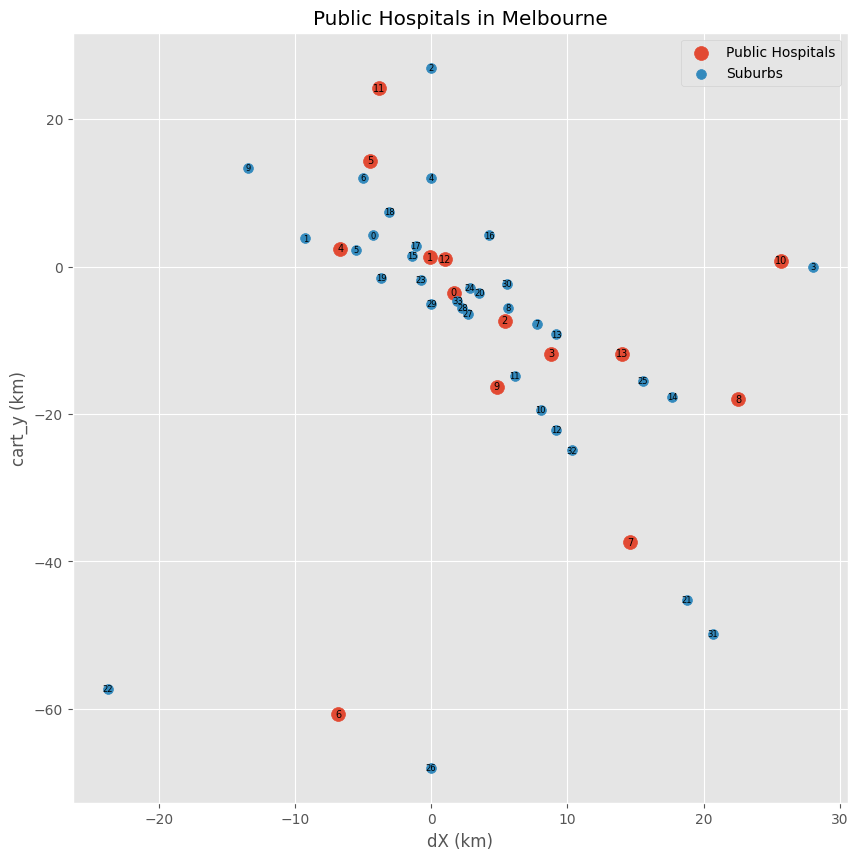

In [11]:
# plot the hospitals on a map
plt.figure(figsize=(10,10))
plt.scatter(public_hospital_locs['cart_x'],public_hospital_locs['cart_y'],s=100)
plt.scatter(data['cart_x'],data['cart_y'],s=50)
for i in range(len(public_hospital_locs)):
	plt.text(public_hospital_locs['cart_x'].iloc[i],public_hospital_locs['cart_y'].iloc[i], i,fontsize=7,ha='center',va='center')
# also annotate the suburbs with their index
for i in range(len(data)):
	plt.text(data['cart_x'].iloc[i],data['cart_y'].iloc[i], i,fontsize=6,ha='center',va='center')
plt.grid(True)
plt.xlabel('dX (km)')
plt.ylabel('cart_y (km)')
plt.title('Public Hospitals in Melbourne')
plt.legend(['Public Hospitals','Suburbs'])
plt.show()


In [12]:
hospital_data.iloc[28]

Public hospital separations, 2012-13                                           4176.784316
Nearest Public Hospital                                                         The Alfred
Travel time to nearest public hospital                                            3.612724
Distance to nearest public hospital                                               2.293315
Obstetric type separations, 2012-13                                     152.30038120309112
Nearest public hospital with maternity services                     Royal Women's Hospital
Time to nearest public hospital with maternity services                          10.528174
Distance to nearest public hospital with maternity services                        8.37104
Presentations to emergency departments, 2012-13                                4549.096887
Nearest public hospital with emergency department                               The Alfred
Travel time to nearest public hospital with emergency department                  3.612724

In [13]:
# for each hospital, find the nearest suburbs
# find the distance between each hospital and each suburb
# find the minimum distance for each hospital
# find the suburb corresponding to the minimum distance for each hospital

# compute pairwise distances between each hospital and each suburb
from scipy.spatial.distance import cdist

# compute the pairwise distances between each hospital and each suburb
distances=cdist(public_hospital_locs[['cart_x','cart_y']],data[['cart_x','cart_y']])
# find the minimum distance for each hospital
min_distances=np.min(distances,axis=1)
# find the suburb corresponding to the minimum distance for each hospital
min_suburb_indices=np.argmin(distances,axis=1)
min_suburbs=data['Community Name'].iloc[min_suburb_indices].values

print('Hospital, Nearest Suburb, Distance (km)')
for i in range(len(public_hospital_locs)):
	print(f'{public_hospital_locs["Hospital"].iloc[i]}, {min_suburbs[i]}, {min_distances[i]:.2f}')


Hospital, Nearest Suburb, Distance (km)
The Alfred, Windsor, 1.12
Royal Melbourne Hospital, North Melbourne, 1.31
Caulfield General Medical Centre, Malvern, 1.72
Monash Medical Centre (Moorabbin), Murrumbeena, 2.65
Western Hospital (Footscray), Footscray, 1.14
Broadmeadows Health Service, Glenroy, 2.41
Rosebud Hospital, St Andrews Beach, 9.95
Frankston Hospital, Somerville, 8.92
Dandenong Hospital, Noble Park, 4.88
Sandringham and District Memorial Hospital, Moorabbin, 1.99
Maroondah Hospital, Croydon, 2.46
Craigieburn Health Service, Craigieburn, 4.69
St Vincent's Hospital, North Melbourne, 2.48
Monash Medical Centre (Clayton), Springvale, 4.07


In [14]:
# allocate each suburb to the nearest hospital using raw distances
nearest_from_compute=pd.DataFrame(columns=['Suburb','Hospital','Distance (km)'])
nearest_from_compute['Suburb']=data['Community Name']
# reverse the computation to get the nearest hospital for each suburb
min_hospital_indices=np.argmin(distances,axis=0)
nearest_from_compute['Hospital']=public_hospital_locs['Hospital'].iloc[min_hospital_indices].values
nearest_from_compute['Distance (km)']=np.min(distances,axis=0)

nearest_from_compute

,Suburb,Hospital,Distance (km)
0,Ascot Vale,Western Hospital (Footscray),3.041644
1,Braybrook,Western Hospital (Footscray),2.919703
2,Craigieburn,Craigieburn Health Service,4.692914
3,Croydon,Maroondah Hospital,2.463702
4,Fawkner,Broadmeadows Health Service,5.058627
5,Footscray,Western Hospital (Footscray),1.142935
6,Glenroy,Broadmeadows Health Service,2.408858
7,Malvern East,Caulfield General Medical Centre,2.415672
8,Malvern,Caulfield General Medical Centre,1.715726
9,Melbourne Airport,Broadmeadows Health Service,9.012057


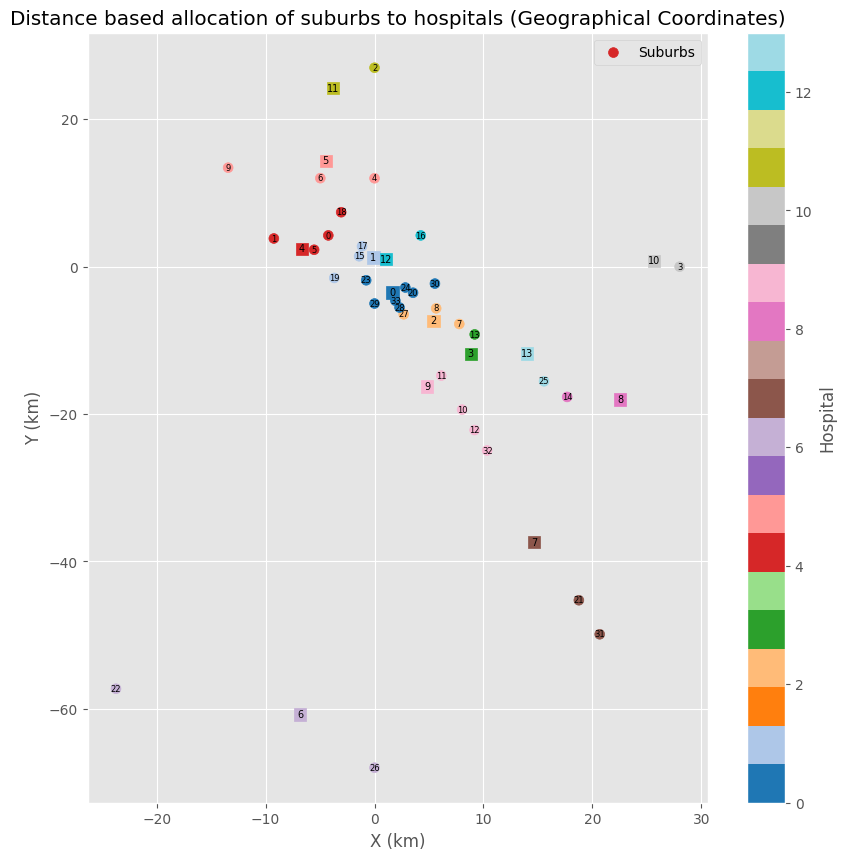

In [15]:
# colour code the suburbs based on the nearest hospital based on raw distances
plt.figure(figsize=(10,10))
plt.scatter(data['cart_x'],data['cart_y'],c=min_hospital_indices,cmap='tab20',s=50)
plt.scatter(public_hospital_locs['cart_x'],public_hospital_locs['cart_y'],s=80,marker='s',cmap='tab20',c=range(len(public_hospital_locs)))
for i in range(len(data)):
	plt.text(data['cart_x'].iloc[i],data['cart_y'].iloc[i], i,fontsize=6,ha='center',va='center')
for i in range(len(public_hospital_locs)):
	plt.text(public_hospital_locs['cart_x'].iloc[i],public_hospital_locs['cart_y'].iloc[i], i,fontsize=7,ha='center',va='center')
plt.grid(True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Distance based allocation of suburbs to hospitals (Geographical Coordinates)')
plt.legend(['Suburbs'])
plt.colorbar(label='Hospital')
plt.show()

In [16]:
# Now use the provided nearest public hospital data to allocate suburbs to hospitals
nearest_from_data=pd.DataFrame(columns=['Suburb','Hospital','Distance (km)'])
nearest_from_data['Suburb']=data['Community Name']
nearest_from_data['Hospital']=hospital_data['Nearest Public Hospital']
nearest_from_data['Distance (km)']=hospital_data['Distance to nearest public hospital']

nearest_from_data.head()

,Suburb,Hospital,Distance (km)
0,Ascot Vale,Western Hospital (Footscray),3.876415
1,Braybrook,Western Hospital (Footscray),3.875731
2,Craigieburn,Craigieburn Health Service,7.277191
3,Croydon,Maroondah Hospital,3.601752
4,Fawkner,Broadmeadows Health Service,6.645261


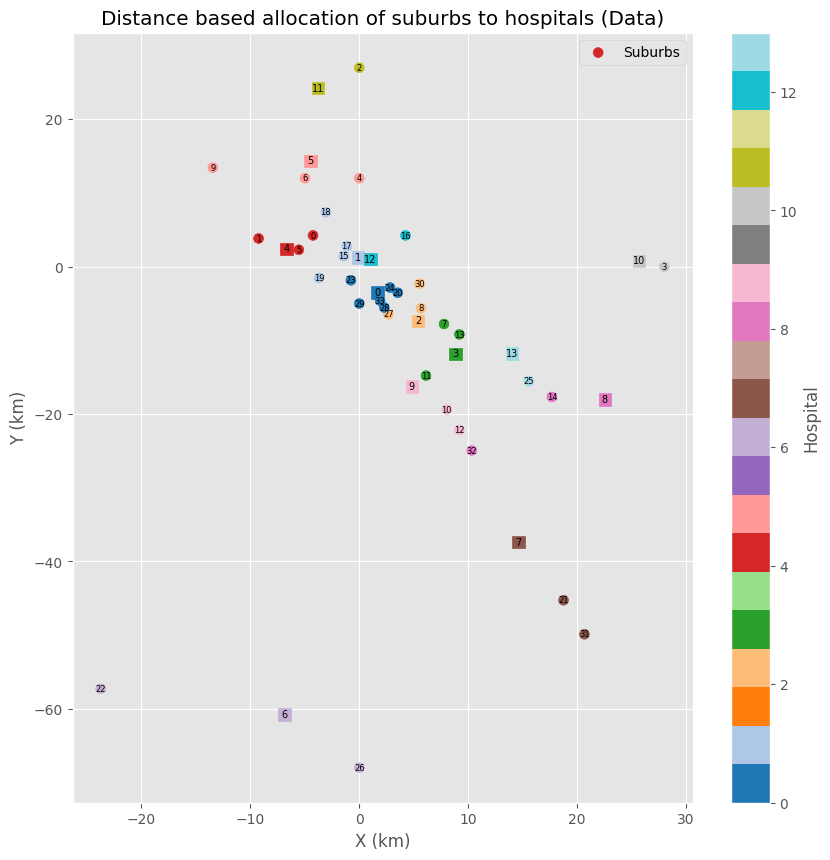

In [17]:
# colour code the suburbs based on the nearest hospital based on data
plt.figure(figsize=(10,10))
plt.scatter(data['cart_x'],data['cart_y'],c=hospital_data['Nearest Public Hospital'].apply(lambda x: public_hospital_locs[public_hospital_locs['Hospital']==x].index[0]+1),cmap='tab20',s=50)
plt.scatter(public_hospital_locs['cart_x'],public_hospital_locs['cart_y'],s=80,marker='s',cmap='tab20',c=range(len(public_hospital_locs)))
for i in range(len(data)):
	plt.text(data['cart_x'].iloc[i],data['cart_y'].iloc[i], i,fontsize=6,ha='center',va='center')
for i in range(len(public_hospital_locs)):
	plt.text(public_hospital_locs['cart_x'].iloc[i],public_hospital_locs['cart_y'].iloc[i], i,fontsize=7,ha='center',va='center')
plt.grid(True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Distance based allocation of suburbs to hospitals (Data)')
plt.legend(['Suburbs'])
plt.colorbar(label='Hospital')
plt.show()

In [18]:
# compare the two allocations using the Jensen-Shannon divergence
# convert the allocations to probability distributions
# compute the Jensen-Shannon divergence

computed_probs=np.zeros((len(data),len(public_hospital_locs)))
for i in range(len(data)):
	computed_probs[i,min_hospital_indices[i]]=1

data_probs=np.zeros((len(data),len(public_hospital_locs)))
for i in range(len(data)):
	data_probs[i,public_hospital_locs[public_hospital_locs['Hospital']==nearest_from_data['Hospital'].iloc[i]].index[0]]=1

jsd=jensenshannon(computed_probs.flatten(),data_probs.flatten())
print(f'Jensen-Shannon divergence between computed and data based allocations: {jsd:.4f}')


Jensen-Shannon divergence between computed and data based allocations: 0.3193


In [19]:
# compute ARI between the two allocations
from sklearn.metrics import adjusted_rand_score

# convert the hospital names to integers
hospital_name_to_int={}
for i in range(len(public_hospital_locs)):
	hospital_name_to_int[public_hospital_locs['Hospital'].iloc[i]]=i

# convert the hospital names to integers
computed_hospitals=[hospital_name_to_int[hospital] for hospital in nearest_from_compute['Hospital']]
data_hospitals=[hospital_name_to_int[hospital] for hospital in nearest_from_data['Hospital']]
ari=adjusted_rand_score(computed_hospitals,data_hospitals)
print(f'Adjusted Rand Index between computed and data based allocations: {ari:.4f}')
# compute NMI between the two allocations
from sklearn.metrics import normalized_mutual_info_score

nmi=normalized_mutual_info_score(computed_hospitals,data_hospitals)
print(f'Normalized Mutual Information between computed and data based allocations: {nmi:.4f}')

Adjusted Rand Index between computed and data based allocations: 0.6675
Normalized Mutual Information between computed and data based allocations: 0.8803
